In [9]:
from matplotlib import pyplot as plt
from fenix_alpha_vantage_interface import alpha_stock_timeseries as asi

In [2]:
alpha = asi.AlphaStockTimeSeries()

In [3]:
alpha.search_endpoint('ABEV3')

INFO:root:Starting API Interface with Endpoint: SYMBOL_SEARCH
INFO:root:Beware! Not using VPN to call Alpha Vantage! This way, even when using different API keys they know who is sending the request! ;D


1 Results returned.


,symbol,name,type,region,marketOpen,marketClose,timezone,currency,matchScore
0,ABEV3.SAO,Ambev S.A,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.7692


In [34]:
ambev_alpha_df = alpha.df_time_series_daily('ABEV3.SAO')

INFO:root:Starting API Interface with Endpoint: TIME_SERIES_DAILY_ADJUSTED
INFO:root:Beware! Not using VPN to call Alpha Vantage! This way, even when using different API keys they know who is sending the request! ;D


### Moving averages

In [37]:
# To reset the dataframe without querying the API again
df = ambev_alpha_df.copy()
ambev_alpha_df.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2021-05-25,17.76,17.8,17.53,17.61,17.61,13934800,0.0000,1.0
1,2021-05-24,17.61,17.74,17.44,17.63,17.63,13810200,0.0000,1.0
2,2021-05-21,17.55,17.63,17.23,17.61,17.61,27233400,0.0000,1.0
3,2021-05-20,17.55,17.64,17.37,17.54,17.54,21301200,0.0000,1.0
4,2021-05-19,17.37,17.6,17.33,17.56,17.56,17513200,0.0000,1.0


In [38]:
df = ambev_alpha_df.set_index('timestamp')

In [53]:
#configs
column_to_roll = 'adjusted_close'
windows_spans = [5, 10, 50, 100]

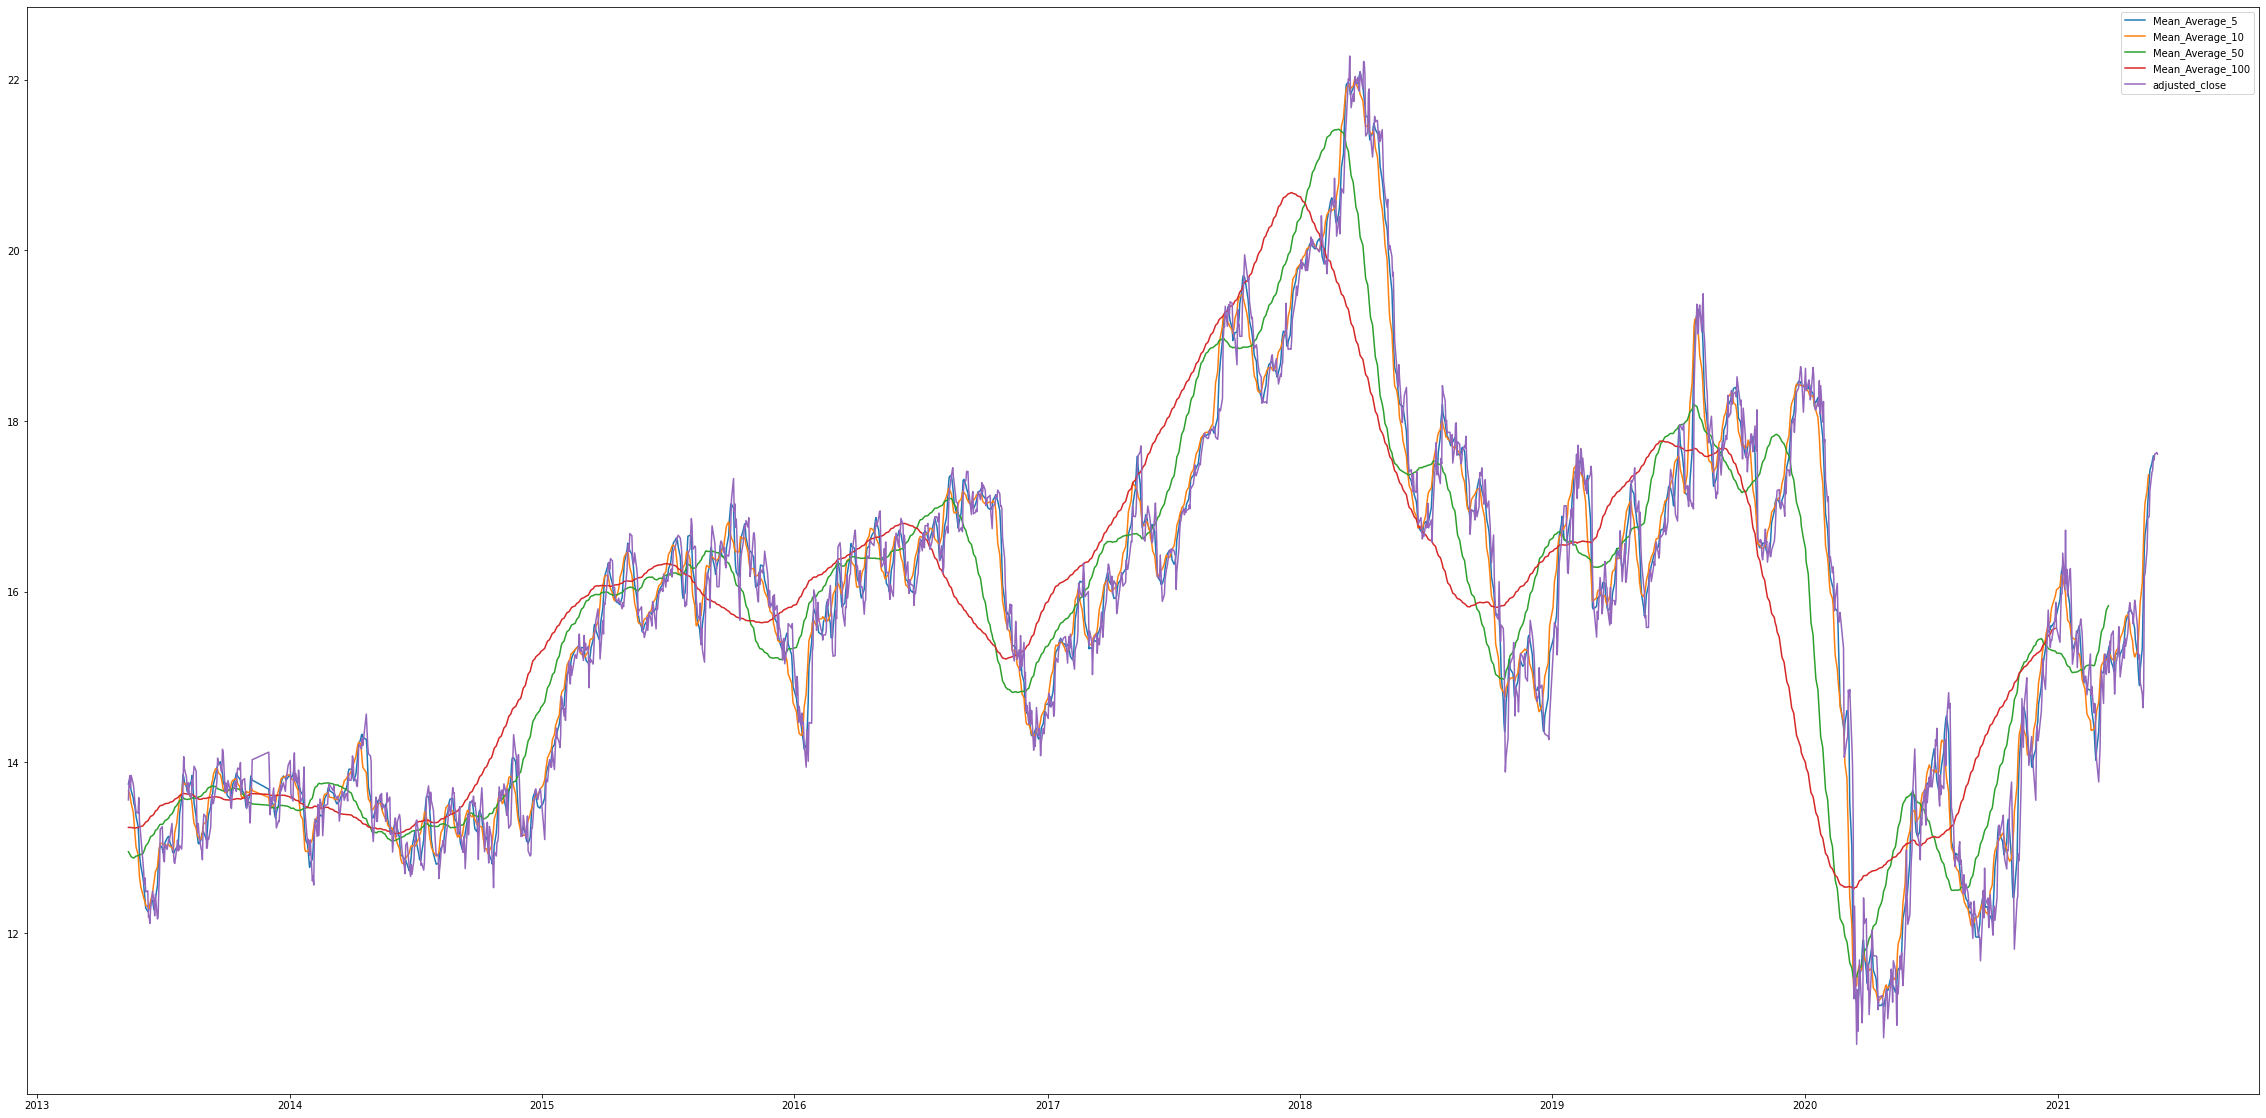

In [58]:
plt.figure(figsize=(40,20))
for window_value in windows_spans:
    new_calculated_column_name = f'Mean_Average_{window_value}'
    df[new_calculated_column_name] = df[column_to_roll].rolling(window=window_value).mean()
    plt.plot(df[new_calculated_column_name], label=new_calculated_column_name)
plt.plot(df[column_to_roll], label=column_to_roll)

plt.legend()
plt.show()